In [ ]:
# https://medium.com/@sonu008/image-enhancement-contrast-stretching-using-opencv-python-6ad61f6f171c

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def contrast_stretching(img):
    RGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    Ig = RGB[:, :, 2]
    [w,h] = np.shape(Ig)
    r=1200.0/Ig.shape[1]
    dim=(1200,int(Ig.shape[0]*r))
    rz = cv.resize(Ig,dim,interpolation=cv.INTER_AREA)
    g = 0.2 * (np.log(1 + np.float32(rz)))
    cvuint = cv.convertScaleAbs(g)
    ret, th = cv.threshold(cvuint, 0, 255, cv.THRESH_OTSU)
    ret1,th1 = cv.threshold(Ig,0,255,cv.THRESH_OTSU)
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (35,35))
    cls = cv.morphologyEx(th, cv.MORPH_OPEN, kernel)
    Im = cls*rz # the mask with resize image
    return (Im,th,th1,cls,g,RGB)

In [17]:
img = cv.imread("night_002.png")
(Im,th,th1,cls,g,RGB) = contrast_stretching(img)

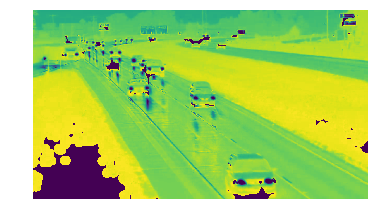

In [18]:
plt.axis("off")
plt.imshow(Im)

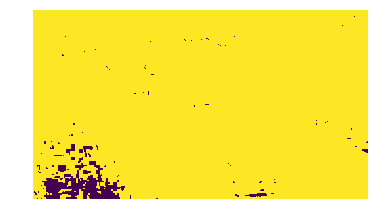

In [19]:
plt.axis("off")
plt.imshow(th)

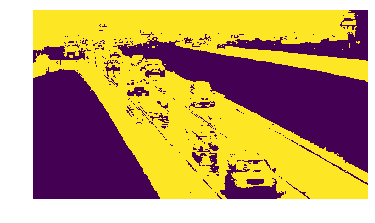

In [20]:
plt.axis("off")
plt.imshow(th1)

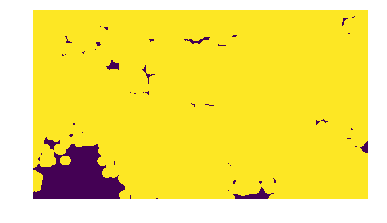

In [21]:
plt.axis("off")
plt.imshow(cls)

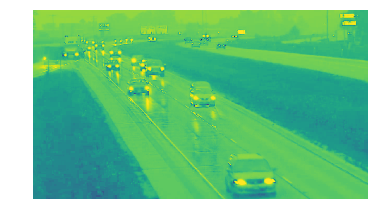

In [22]:
plt.axis("off")
plt.imshow(g)

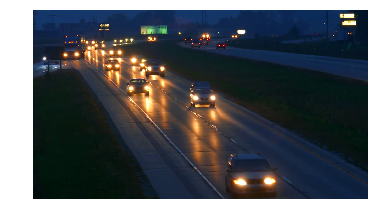

In [23]:
plt.axis("off")
plt.imshow(RGB)